## MTH 9893 HW #4 Group B -- Kevin Griffin, Yicheng Sun, Ziyuan Li, and Haochen Lu

## Problem 1

### （a）
$ X ∼ N(µ, \sigma): $
$$H(X) = -\int_{-\infty}^{\infty} f(x) \log f(x) dx$$
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
$$\log f(x) = \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\right) = \log \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \log \left(e^{-\frac{(x-\mu)^2}{2\sigma^2}}\right) = -\frac{1}{2} \log (2\pi\sigma^2) - \frac{(x-\mu)^2}{2\sigma^2}$$

$$
\begin{gathered}
H(X) & = & -\int_{-\infty}^{\infty} f(x) \log f(x) \, dx \\
& = & -\int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \left(-\frac{1}{2} \log (2\pi\sigma^2) - \frac{(x-\mu)^2}{2\sigma^2}\right) \, dx \\
& = & \frac{1}{2} \log (2\pi\sigma^2) \int_{-\infty}^{\infty} f(x) \, dx + \frac{1}{2\sigma^2} \int_{-\infty}^{\infty} f(x) (x-\mu)^2 \, dx \\
& = & \frac{1}{2} \log (2\pi\sigma^2) + \frac{1}{2\sigma^2} E[(X-\mu)^2] \\
& = & \frac{1}{2} \log (2\pi\sigma^2) + \frac{\sigma^2}{2\sigma^2} \\
& = & \frac{1}{2} \log (2\pi e \sigma^2)
\end{gathered}

$$

$ X ∼ N(µ, Σ) $

$$H(X) = -\int_{-\infty}^{\infty} f(x) \log f(x) dx$$
$$f(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)}$$
$$\log f(x) = \log \left(\frac{1}{(2π)^{p/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)}\right)$$
$$= \log \left(\frac{1}{(2π)^{p/2}|\Sigma|^{1/2}}\right) + \log \left(e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)}\right)$$
$$= -\frac{p}{2} \log (2\pi) - \frac{1}{2} \log |\Sigma| - \frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)$$


$$H(X) = -\int_{-\infty}^{\infty} f(x) \log f(x) dx$$
$$= -\int_{-\infty}^{\infty} \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)} \left(-\frac{p}{2} \log (2\pi) - \frac{1}{2} \log |\Sigma| - \frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)\right) dx$$
$$= \frac{p}{2} \log (2\pi) + \frac{1}{2} \log |\Sigma| + E\left[\frac{1}{2}(X-\mu)^T \Sigma^{-1} (X-\mu)\right]$$

Using the property of trace and determinant, we can further simplify the last term as follows:

$$E\left[\frac{1}{2}(X-\mu)^T \Sigma^{-1} (X-\mu)\right] = E\left[\frac{1}{2}\text{tr}\left((X-\mu)^T \Sigma^{-1} (X-\mu)\right)\right]$$
$$= E\left[\frac{1}{2}\text{tr}\left(\Sigma^{-1} (X-\mu)(X-\mu)^T\right)\right]$$
$$= \frac{1}{2}\text{tr}\left(\Sigma^{-1} E[(X-\mu)(X-\mu)^T]\right)$$
$$= \frac{1}{2}\text{tr}\left(\Sigma^{-1} \Sigma\right)$$
$$= \frac{p}{2}$$

### （b）
$$D(P||Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}$$

$$D(P||Q) = \sum_{x=0}^n {n \choose x} p^x (1-p)^{n-x} \log \frac{{n \choose x} p^x (1-p)^{n-x}}{{n \choose x} q^x (1-q)^{n-x}}$$

$$D(P||Q) = \sum_{x=0}^n {n \choose x} p^x (1-p)^{n-x} \left[ x \log \frac{p}{q} + (n-x) \log \frac{1-p}{1-q} \right]$$
$$D(P||Q) = np \log \frac{p}{q} + n(1-p) \log \frac{1-p}{1-q}$$

## Problem 2

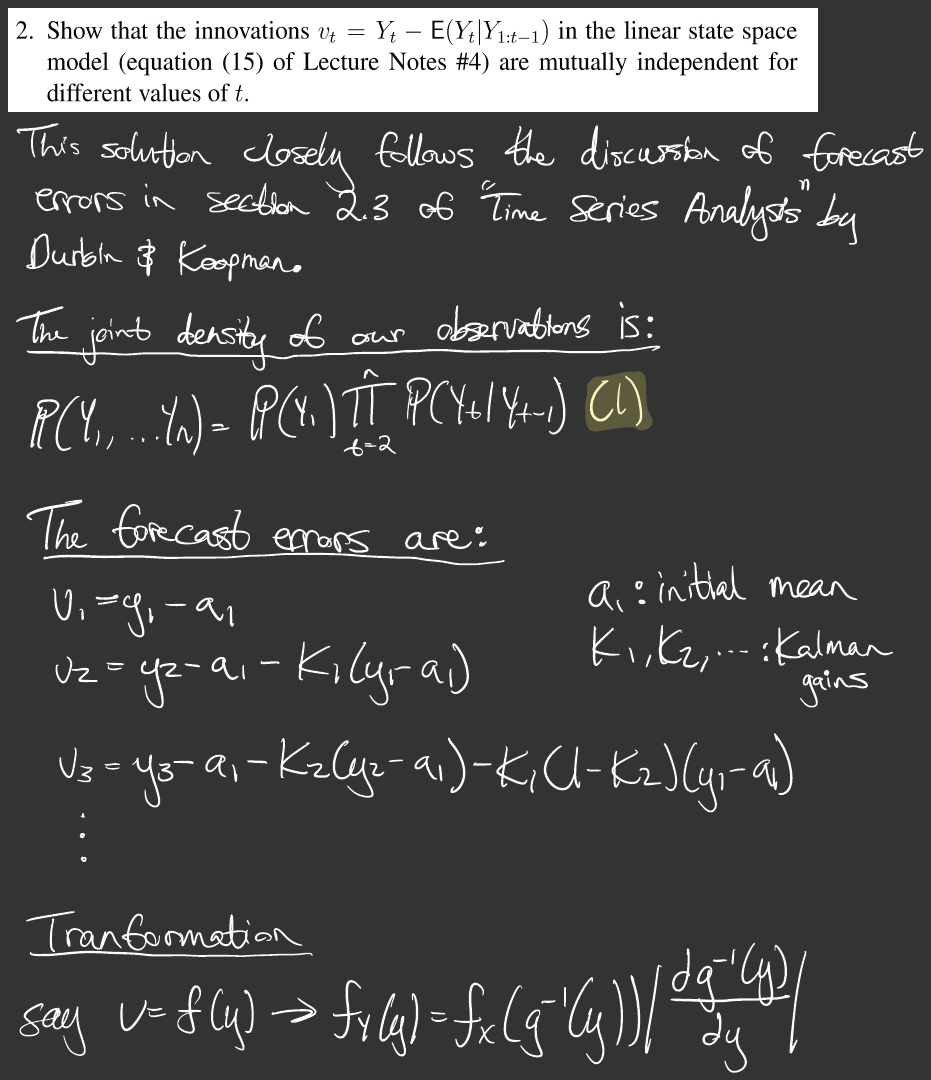

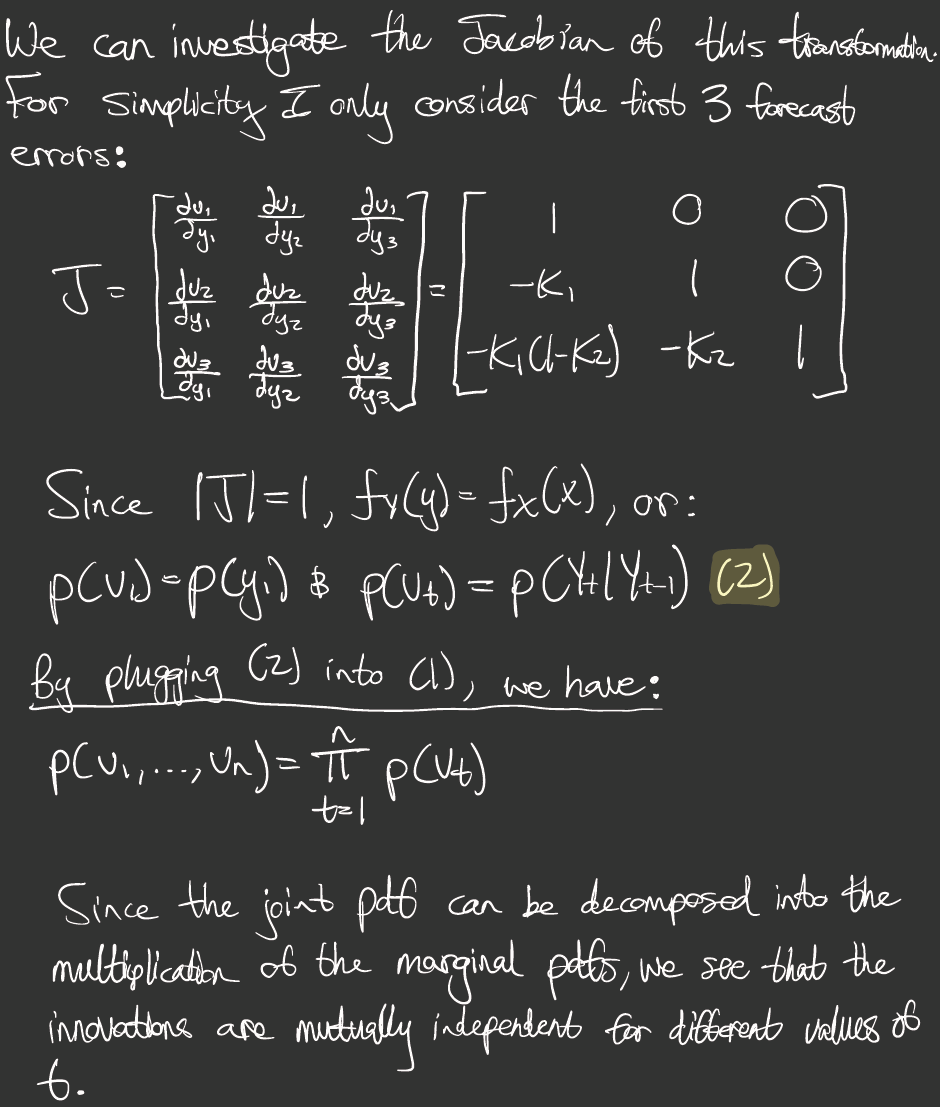

## Problem 3

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from statsmodels.tsa.statespace.kalman_smoother import KalmanSmoother
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
## Download the last 5 years of the adjusted daily close prices of TSLA and the S&P 500.
end_date = pd.Timestamp.now().date() ## Today's date.
start_date = end_date - pd.DateOffset(years=5) ## Date 5 years ago.

tsla = yf.download('TSLA', start=start_date, end=end_date)['Adj Close'] ## TSLA data.
spx = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close'] ## S&P data.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
## CAPM Model construction.

## Calculate returns
tsla_return = tsla.pct_change().dropna()
spx_return = spx.pct_change().dropna()

## Rolling window CAPM model.
window_size = 63 ## 3 month rolling window (63 days).
alpha_values = [] ## Array of computed alpha values.
beta_values = [] ## Array of computed beta values.

for i in range(len(tsla_return) - window_size + 1):
    CAPM_model = LinearRegression().fit(spx_return[i:i + window_size].values.reshape(-1, 1), tsla_return[i:i + window_size])
    beta_values.append(CAPM_model.coef_[0])
    alpha_values.append(CAPM_model.intercept_)

#print(tsla_return)
#print(endog)
#print(exog)
#print(alpha_values)
#print(beta_values)

In [14]:
## Linear State Space Model construction.

## X(t) and Y(t) values. Note, our first calculated beta occurs after 63 data points, so we need to truncate the start of the return data as well.
X = alpha_values
Y = tsla_return[window_size-1:] - beta_values * spx_return[window_size-1:]

## Create the Kalman Filter model and bind the observed data.
kf = KalmanFilter(k_endog=Y.values.reshape(-1, 1), k_states=1) ## 1 state.

## Set the state space representation matrices.
kf['design'] = np.array([[1]])        ## Y_t+1 = H*Y_t + noise
kf['obs_cov'] = np.array([[1]])       ## Observation noise covariance (using 1).
kf['transition'] = np.array([[1]])    ## Y_t = X_t + noise
kf['selection'] = np.eye(1)           ## Direct linkage between noise and states.
kf['state_cov'] = np.array([[1]])     # Process noise covariance (using 1).
kf.initialize_known(np.array([X[0]]), np.array([[1]])) ## Use our first alpha value from the rolling window as the initial mean.
                                                       ## Use 1 as the initial state covariance.

## Filter the data.
filtered_results = kf.filter()
state_means = filtered_results.filtered_state[0]
state_covariances = filtered_results.filtered_state_cov

# display(state_means)

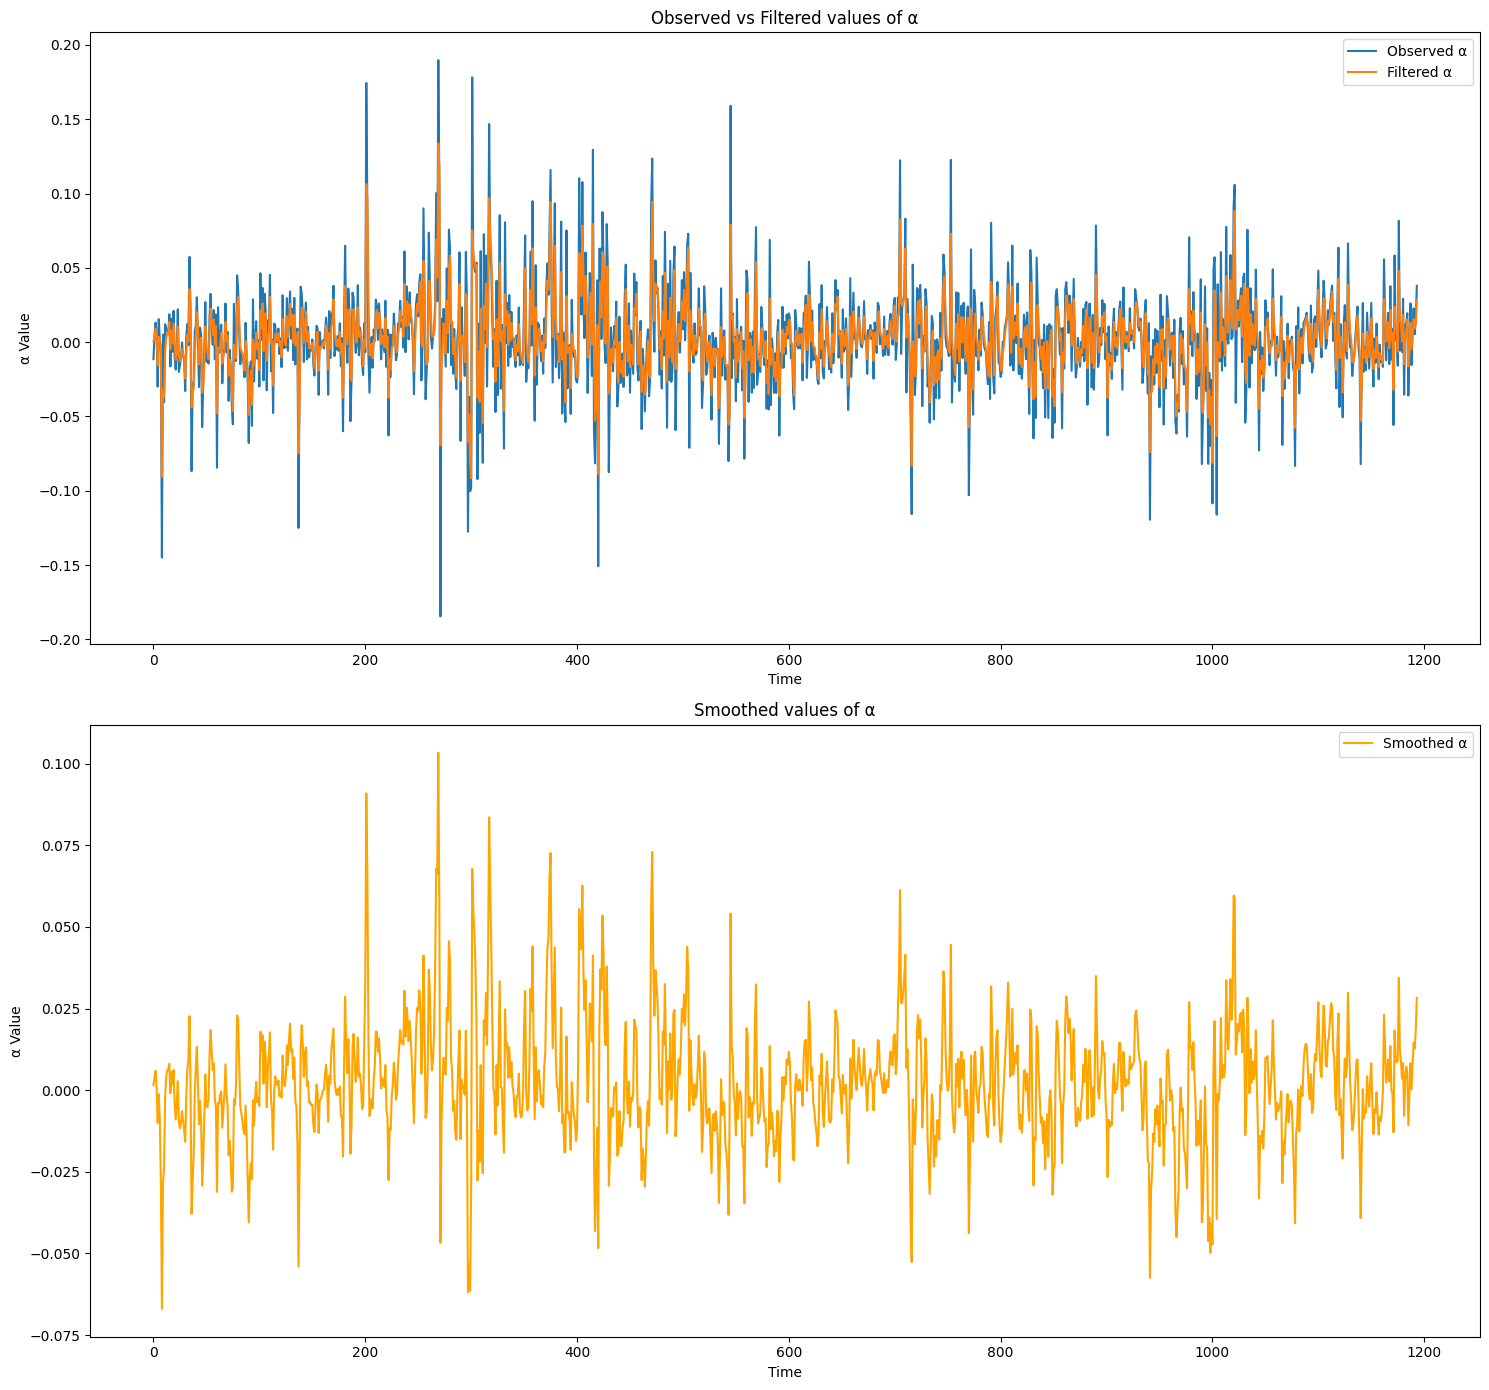

In [9]:
## Plotting.
fig, ax = plt.subplots(2, 1, figsize=(15, 14))  # Create 2 vertically arranged subplots

## Plot Observed vs Filtered values of α.
ax[0].plot(Y.values, label='Observed α')
ax[0].plot(state_means, label='Filtered α')
ax[0].legend()
ax[0].set_title('Observed vs Filtered values of α')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('α Value')

## Initialize the KalmanSmoother object using the same configurations as the KalmanFilter.
ks = KalmanSmoother(k_endog=Y.values.reshape(-1, 1), k_states=1)
ks['design'] = kf['design']
ks['obs_cov'] = kf['obs_cov']
ks['transition'] = kf['transition']
ks['selection'] = kf['selection']
ks['state_cov'] = kf['state_cov']
ks.initialize_known(np.array([X[0]]), np.array([[1]]))

## Smooth the filtered results.
smoothed_results = ks.smooth()
smoothed_state_means = smoothed_results.smoothed_state[0]

# Plot Observed vs Smoothed values of α.
#ax[1].plot(state_means, label='Filtered α')
ax[1].plot(smoothed_state_means, label='Smoothed α', linestyle='-', color='orange')
ax[1].legend()
ax[1].set_title('Smoothed values of α')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('α Value')

# Display the plots
plt.tight_layout()
plt.show()

In [16]:
## Evaluate the predictive performance of the unsmoothed results.

## True values.
y_true = Y.values
## Naive prediction for comparison.
y_naive_pred = y_true[:-1]
naive_mse = mean_squared_error(y_true = y_true[1:],y_pred = y_naive_pred)
r2 = r2_score(y_true = y_true[1:], y_pred = y_naive_pred)
print(f"Naive MSE: {naive_mse:.5f}")
print(f"R^2: {r2:.5f}")

print("\n")

##  estimates.
y_pred = state_means

## Compute metrics.
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print('kalman state estimates.')
print(f"MAE: {mae:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R^2: {r2:.5f}")

##  smoothed estimates.
y_pred = smoothed_state_means
## Compute metrics.
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print('smoothed estimates.')
print(f"MAE: {mae:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R^2: {r2:.5f}")

Naive MSE: 0.00248
R^2: -0.99276


kalman state estimates.
MAE: 0.01153
MSE: 0.00026
RMSE: 0.01619
R^2: 0.78888
smoothed estimates.
MAE: 0.01570
MSE: 0.00047
RMSE: 0.02156
R^2: 0.62536


We can see that the naive prediction (tomorrow's return = today's return), performs extremely poorly. 


The kalman filter model performs relatively well and explains approximately 79% of the observed variance.


We can see that smoothing reduces the explained variance by approximately 16%. 